In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.colors as plt_colors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns

In [2]:
colors = ["#040614", "#f8e6d5", "#bd023e"]

# Exploratory Data Analysis

In [9]:
#01-Load Wine dataset (scikit library)
#02-Select the first two attributes for a 2D representation of the image.
data = load_wine()
from sklearn.decomposition import PCA
features = data['data']
scaler = StandardScaler()
scaler.fit(features)
features_std = scaler.transform(features)
pca = PCA(2)
pca.fit(features_std)
features = pca.transform(features_std)
data.feature_names[0]='PCA 1'
data.feature_names[1]='PCA 2'

labels = data['target']
df = pd.DataFrame(data=features[:, :2], columns=data.feature_names[:2])
df.head()

,PCA 1,PCA 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [10]:
#print(data['DESCR'])

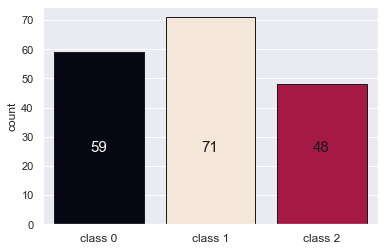

In [11]:
# plot the distribution of the labels in the dataset
sns.set()
ax = sns.countplot(labels, edgecolor='k', palette=colors);
ax.set_xticklabels(["class 0", "class 1", "class 2"], 
                   fontsize=12)

for p, c in zip(ax.patches, ['w', 'k', 'k']):
    ax.annotate(f"{p.get_height()}", (p.get_x() + 0.32, 25), fontsize=15, c=c)
#ax.set_title("Label distribution", fontsize=14); # TODO: è corretto come titolo?
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/label_distribution.png')

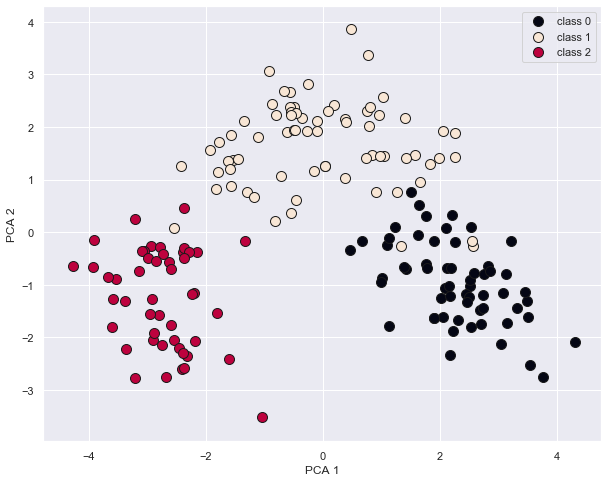

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
y = labels
for c, c_ in enumerate(['class 0', 'class 1', 'class 2']):
    ax.scatter(features[y==c, 0], features[y==c, 1], c=colors[c], edgecolors='k', label=c_, s=100)
ax.legend()

xlim = [features[:, 0].min()-1, features[:, 0].max()+1]
ylim = [features[:, 1].min()-1, features[:, 1].max()+1]

ax.set_xlabel(data['feature_names'][0])
ax.set_ylabel(data['feature_names'][1])

#ax.set_title('Wine Dataset pair-plot') # TODO: change name
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/feature_distribution.png')

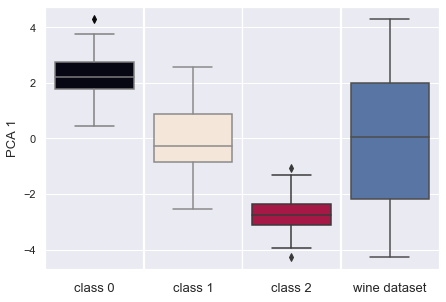

In [13]:
fig, ax = plt.subplots(ncols=4, sharey=True)
ax[0].set_ylabel(data['feature_names'][0], fontsize=13)
for i in range(0, 3):
    box = sns.boxplot(y=features[y==i, 0], ax = ax[i], color=colors[i])
    if i==0:
        plt.setp(box.artists, edgecolor = 'grey')
        plt.setp(box.lines, color='grey')
    ax[i].set_xlabel(f'class {i}', fontsize=13)
sns.boxplot(y=features[:, 0], ax = ax[3])
ax[3].set_xlabel(f'wine dataset', fontsize=13);

plt.tight_layout(pad=0)
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/boxplot_1.png')

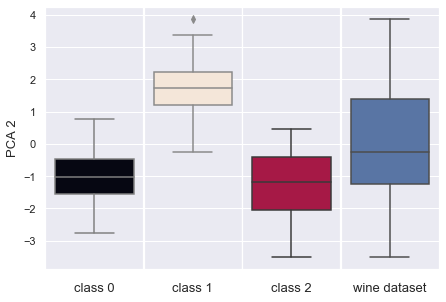

In [14]:
fig, ax = plt.subplots(ncols=4, sharey=True)
ax[0].set_ylabel(data['feature_names'][1], fontsize=13)
for i in range(0, 3):
    box = sns.boxplot(y=features[y==i, 1], ax = ax[i], color=colors[i])
    if i==0:
        plt.setp(box.artists, edgecolor = 'grey')
        plt.setp(box.lines, color='grey')
    ax[i].set_xlabel(f'class {i}', fontsize=13)

sns.boxplot(y=features[:, 1], ax = ax[3])
ax[3].set_xlabel(f'wine dataset', fontsize=13);

plt.tight_layout(pad=0)
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/boxplot_2.png')

In [15]:
means = np.mean(df.iloc[:,0:2]).round(2)
std_dev = np.std(df.iloc[:, 0:2]).round(2)
median = np.median(df.iloc[:, 0:2], axis=0).round(2)
print(f"Feature '{data['feature_names'][0]}':\tmean:{means[0]}\tstd dev:{std_dev[0]}\tmedian:{median[0]}")
print(f"Feature '{data['feature_names'][1]}':\tmean:{means[1]}\tstd dev:{std_dev[1]}\tmedian:{median[1]}")

Feature 'PCA 1':	mean:0.0	std dev:2.17	median:0.06
Feature 'PCA 2':	mean:0.0	std dev:1.58	median:-0.26


In [16]:
means = np.mean(df.iloc[:,0:2]).round(2)
std_dev = np.std(df.iloc[:, 0:2]).round(2)
median = np.median(df.iloc[:, 0:2], axis=0).round(2)

for i in [0,1]:
    print(f"Feature '{data['feature_names'][i]}':\n\tmean:{means[i]}\tstd dev:{std_dev[i]}\tmedian:{median[i]}")
    q = np.percentile(features[:,i], [25, 50, 75]).round(2)
    print(f"\tQ1:{q[0]}\tQ2:{q[1]}\tQ3:{q[2]}\tIRQ:{(q[2]-q[0]).round(2)}")
    for i in range(0, 3):
        q = np.percentile(features[:,0], [25, 50, 75]).round(2)
        print(f"\t\tclass {i}:\tQ1:{q[0]}\tQ2:{q[1]}\tQ3:{q[2]}\tIRQ:{(q[2]-q[0]).round(2)}")
    print()

Feature 'PCA 1':
	mean:0.0	std dev:2.17	median:0.06
	Q1:-2.17	Q2:0.06	Q3:2.0	IRQ:4.17
		class 0:	Q1:-2.17	Q2:0.06	Q3:2.0	IRQ:4.17
		class 1:	Q1:-2.17	Q2:0.06	Q3:2.0	IRQ:4.17
		class 2:	Q1:-2.17	Q2:0.06	Q3:2.0	IRQ:4.17

Feature 'PCA 2':
	mean:0.0	std dev:1.58	median:-0.26
	Q1:-1.23	Q2:-0.26	Q3:1.4	IRQ:2.63
		class 0:	Q1:-2.17	Q2:0.06	Q3:2.0	IRQ:4.17
		class 1:	Q1:-2.17	Q2:0.06	Q3:2.0	IRQ:4.17
		class 2:	Q1:-2.17	Q2:0.06	Q3:2.0	IRQ:4.17



# Data Split and Standardization

In [17]:
# TODO : move this on utils.py
def train_validation_test_split(X, y, train_size=0.5, val_size=0.2, test_size=0.3, shuffle=True, random_state=None):
    if (train_size + test_size + val_size != 1.0):
        raise ValueError("The parameters train_size, test_size, val_size do not sum to 1.0")
    if train_size == 0. or test_size == 0. or val_size == 0.:
        raise ValueError("One of parameters train_size, test_size, val_size is equal to 0.0")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size= test_size, 
                                                        shuffle=shuffle, 
                                                        random_state=random_state) 
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                      train_size= train_size/(train_size+val_size), 
                                                      shuffle=shuffle,
                                                      random_state=random_state
                                                      #shuffle=False,  # the data is already shuffled from the previous train_test_split
                                                                      # TODO: is it necessary to shuffle again?
                                                      #random_state=random_state
                                                    )
    return X_train, X_val, X_test, y_train, y_val, y_test

In [18]:
X_train, X_val, X_test, y_train, y_val, y_test = \
    train_validation_test_split(features, labels, random_state=42) 
X_train.shape, X_val.shape, X_test.shape,  y_train.shape, y_val.shape, y_test.shape

((88, 2), (36, 2), (54, 2), (88,), (36,), (54,))

In [19]:
# TODO : move this on utils.py
def standardize(X_train, X_val, X_test, y_train, scaler=StandardScaler()):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_val_std = scaler.transform(X_val)
    X_test_std = scaler.transform(X_test)

    X_train_full = np.vstack((X_train, X_val))
    y_train_full = np.concatenate((y_train, y_val))
    scaler.fit(X_train_full)
    X_train_full_std = scaler.transform(X_train_full)
    X_test_full_std = scaler.transform(X_test)
    
    return X_train_std, X_val_std, X_test_std, X_train_full_std, X_test_full_std, y_train_full

In [20]:
X_train_std, X_val_std, X_test_std, X_train_full_std, X_test_full_std, y_train_full = \
    standardize(X_train, X_val, X_test, y_train)
print(f"X_train_std: mean: {X_train_std.mean().round(3)}, std_dev: { X_train_std.std().round(3)}")
print(f"X_train_full_std: mean: {X_train_full_std.mean().round(3)}, std_dev: { X_train_full_std.std().round(3)}")

X_train_std: mean: 0.0, std_dev: 1.0
X_train_full_std: mean: -0.0, std_dev: 1.0


In [21]:
# TODO : move this on utils.py
def plot_decision_function(X, y, clf, ax, title=None, x_label=None, y_label=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
        
    if title is not None:
        ax.title.set_text(title)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)

# Validation Set Approach

## K-Nearest Neighbors

In [22]:
# 04-For K = [1,3, 5,7]: 
#       a. Apply K-Nearest Neighbors
#       b. Plot the data and the decision boundaries
#       c. Evaluate the method on the validation set

# a. Apply K-Nearest Neighbors
k_values = [1, 3, 5, 7]
knn = {}
for k in k_values:
    knn_ = KNeighborsClassifier(n_neighbors=k, 
                                #metric='l1'
                                #algorithm='brute', 
                                #metric='mahalanobis', 
                                #metric_params={'VI':np.linalg.inv(np.cov(X_train_std.T).T)}
                               )
    knn_.fit(X_train_std, y_train)
    knn[k] = knn_

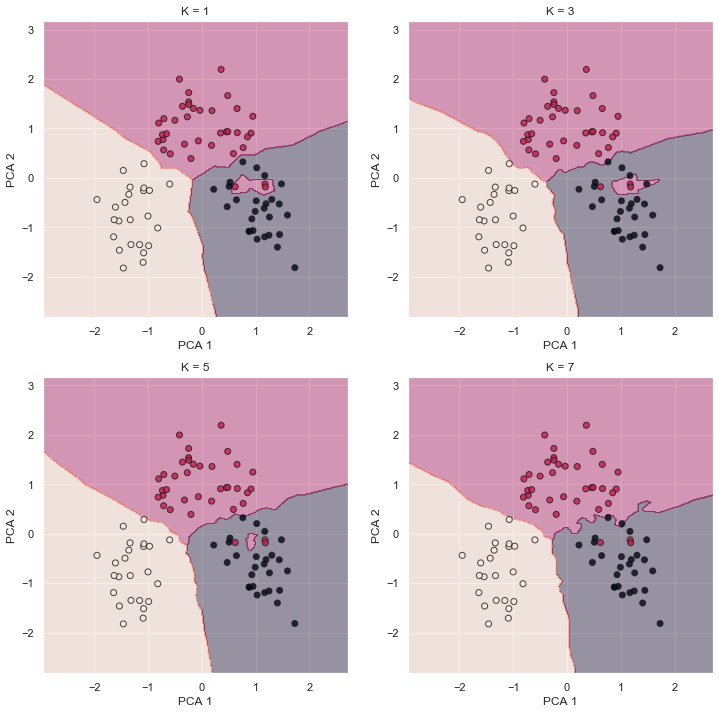

In [23]:
# b. Plot the data and the decision boundaries
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for k, ax_ in zip(k_values, ax.flatten()):
    plot_decision_function(X_train_std, y_train, knn[k], ax_, 
                           f"K = {k}", data.feature_names[0], data.feature_names[1]);
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/knn_1.png')

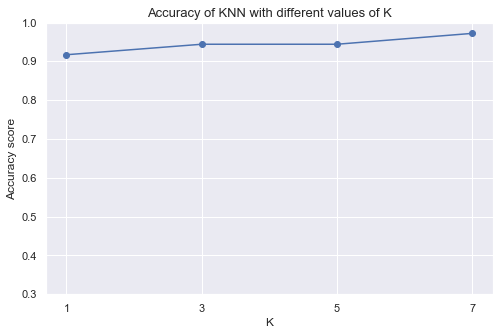

In [24]:
# c. Evaluate the method on the validation set
scores = {k: v.score(X_val_std, y_val).round(3) for k, v in knn.items()}
#print(scores)
# 05-Plot a graph showing how the accuracy on the validation set varies when changing K
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title("Accuracy of KNN with different values of K", fontsize=13)
ax.set_ylabel("Accuracy score")
ax.set_xlabel("K")
ax.set_xticks(k_values)
ax.set_ylim([0.3, 1.])
ax.plot(k_values, np.array(list(scores.values())), '-o');
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/knn_2.png')

In [25]:
from sklearn.metrics import precision_recall_fscore_support #TODO: move at the beginning
pred = {k: v.predict(X_val_std) for k, v in knn.items()}
prfs = {k: precision_recall_fscore_support(y_val, v, average='weighted') for k, v in pred.items()}
for k, v in prfs.items():
    print(f"{k}: precision: {v[0]:.3}\trecall: {v[1]:.3}\tfscore: {v[2]:.3}")

1: precision: 0.923	recall: 0.917	fscore: 0.917
3: precision: 0.947	recall: 0.944	fscore: 0.945
5: precision: 0.947	recall: 0.944	fscore: 0.945
7: precision: 0.975	recall: 0.972	fscore: 0.972


In [59]:
# 07-Use the best value of K and evaluate the model on the test set. How well does it works?
knn_best = KNeighborsClassifier(n_neighbors=7).fit(X_train_full_std, y_train_full)

print("Best KNN model")
print(f"\tAccuracy score on test set: {knn_best.score(X_test_std, y_test): .3}")
prf = precision_recall_fscore_support(y_test, knn_best.predict(X_test_std), average='weighted')
print(f"\tPrecision: {prf[0]:.3}\trecall: {prf[1]:.3}\tfscore: {prf[2]:.3}")

Best KNN model
	Accuracy score on test set:  0.981
	Precision: 0.982	recall: 0.981	fscore: 0.981


### Other metrics

In [27]:
knn_metrics = [knn_best, ]
knn_metrics.append(KNeighborsClassifier(n_neighbors=5,
                                        metric='l1').fit(X_train_full_std, y_train_full))
knn_metrics.append(KNeighborsClassifier(n_neighbors=5, 
                                        algorithm='brute',
                                        metric='mahalanobis',
                                        metric_params={'VI':np.linalg.inv(np.cov(X_train_std.T).T)}
                                       ).fit(X_train_full_std, y_train_full))

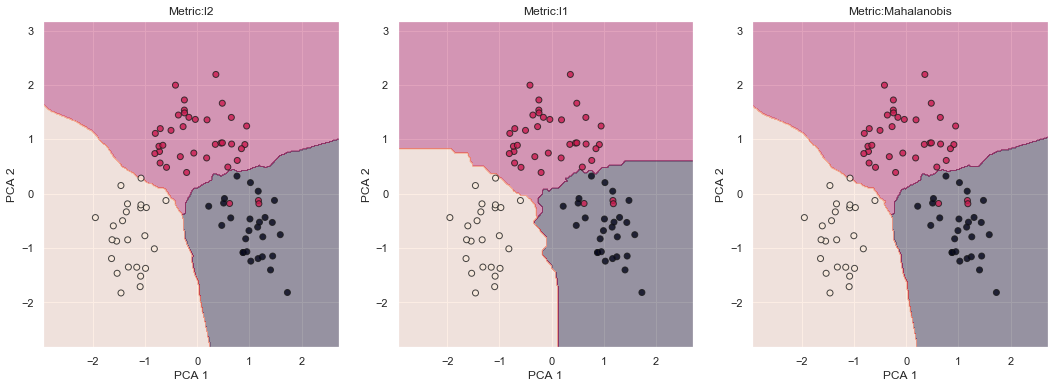

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for kc, ax_, m in zip(knn_metrics, ax.flatten(), ['l2', 'l1', 'Mahalanobis']):
    plot_decision_function(X_train_std, y_train, kc, ax_, 
                            f"Metric:{m}", data.feature_names[0], data.feature_names[1]);
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/knn_3.png')

## Linear SVC

In [29]:
#08-For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]:
#        a. Train a linear SVM on the training set
#        b. Plot the data and the decision boundaries
#        c. Evaluate the method on the validation set    

#a. Train a linear SVM on the training set
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linear_svc_dict = {c: SVC(kernel='linear', C=c).fit(X_train_std, y_train) for c in C_values}

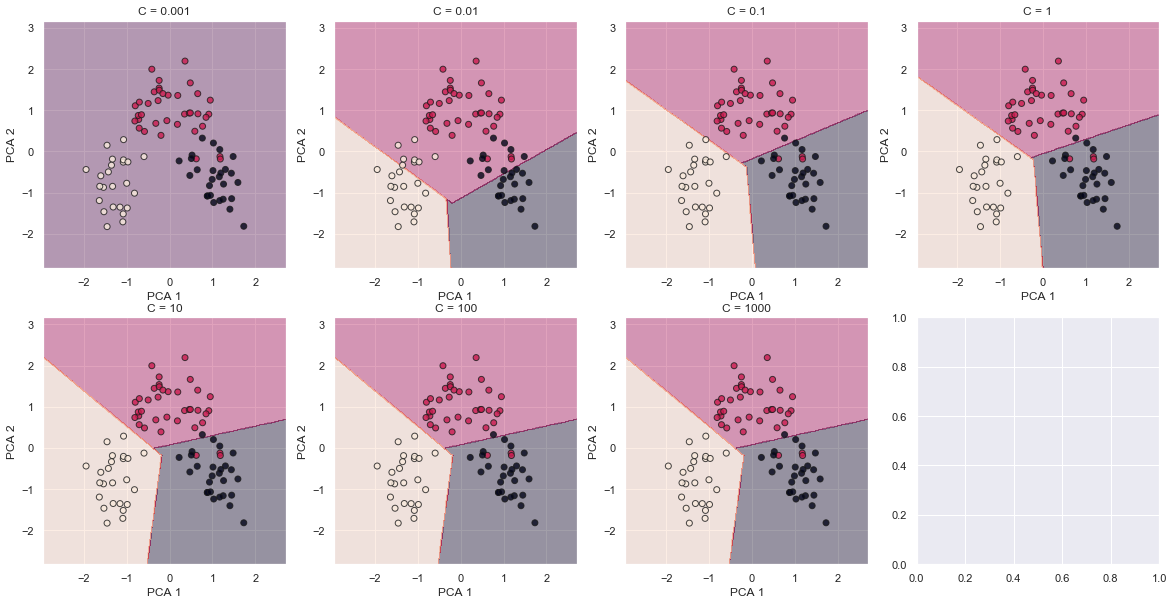

In [30]:
#b. Plot the data and the decision boundaries
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for c, ax_ in zip(C_values, ax.flatten()):
    plot_decision_function(X_train_std, y_train, linear_svc_dict[c], ax_, 
                           f"C = {c}", data.feature_names[0], data.feature_names[1]);
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/lsvm_1.png')

In [31]:
# c. Evaluate the method on the validation set 
# 09-Plot a graph showing how the accuracy on the validation set varies when changing C

linear_svc_scores_val = {c:svc.score(X_val_std, y_val).round(3) for c, svc in linear_svc_dict.items()}
print(f"Accuracy scores: {linear_svc_scores_val}")
print()
print("Precision, Recall and F-score:")
pred = {k: v.predict(X_val_std) for k, v in linear_svc_dict.items()}
prfs = {k: precision_recall_fscore_support(y_val, v, average='weighted') for k, v in pred.items()}
for k, v in prfs.items():
    print(f"{k}\t:\tprecision: {v[0]:.3f}\trecall: {v[1]:.3f}\tfscore: {v[2]:.3f}")

Accuracy scores: {0.001: 0.361, 0.01: 0.694, 0.1: 0.972, 1: 0.972, 10: 0.972, 100: 0.972, 1000: 0.972}

Precision, Recall and F-score:
0.001	:	precision: 0.130	recall: 0.361	fscore: 0.192
0.01	:	precision: 0.834	recall: 0.694	fscore: 0.690
0.1	:	precision: 0.975	recall: 0.972	fscore: 0.972
1	:	precision: 0.975	recall: 0.972	fscore: 0.972
10	:	precision: 0.975	recall: 0.972	fscore: 0.972
100	:	precision: 0.975	recall: 0.972	fscore: 0.972
1000	:	precision: 0.975	recall: 0.972	fscore: 0.972


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


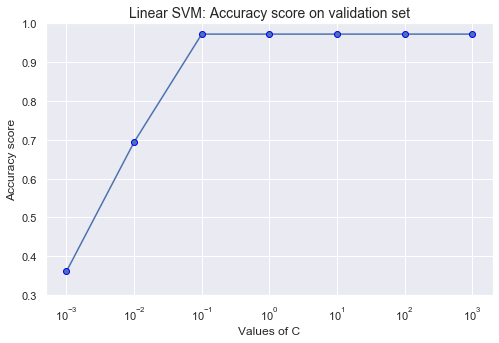

In [32]:
# 09-Plot a graph showing how the accuracy on the validation set varies when changing C
#plot Accuracy vs C value
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel('Values of C')
ax.set_ylabel('Accuracy score')
plt.xticks(C_values)
plt.xscale('log')
ax.set_ylim([0.3, 1.])
ax.set_title("Linear SVM: Accuracy score on validation set", 
             fontdict={'fontsize':14})
ax.plot(C_values, list(linear_svc_scores_val.values()), marker = 'o', markeredgecolor= 'blue');
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/lsvm_2.png')

In [61]:
lsvm_best = SVC(C=1000, kernel='linear').fit(X_train_full_std, y_train_full)
print("Best Linear SVM model")
print(f"\tAccuracy score on test set: {lsvm_best.score(X_test_std, y_test): .3}")
prf = precision_recall_fscore_support(y_test, lsvm_best.predict(X_test_std), average='weighted')
print(f"\tPrecision: {prf[0]:.3}\trecall: {prf[1]:.3}\tfscore: {prf[2]:.3}")

Best Linear SVM model
	Accuracy score on test set:  0.981
	Precision: 0.982	recall: 0.981	fscore: 0.981


### Overview of OVR multiclass SVM

In [34]:
def plot_decision_SVM_margins(c, X, y, ax, colors, title=None, x_label=None, y_label=None):
    
    clf = SVC(kernel='linear', C=c)
    classes = np.unique(y_train)
    
    from matplotlib import colors as clr_ #TODO move outside
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=80,
                cmap=clr_.ListedColormap(["#040614", "#bd023e", "#f8e6d5"]))
    
    # plot the decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    
    for i in classes:
        y_train_ = y.copy()
        
        not_i = (i+1)%len(classes)
        for j in classes:
            if j != i: 
                y_train_[(y_train_ == j)] = not_i
                
        #print(np.unique(y_train_))
        clf.fit(X, y_train_)

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # plot decision margins
        ax.contour(xx, yy, Z, colors=['r', 'k', 'b'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=[(0, (5, 1)), '-', (0, (5, 1))])

        # plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=160,
                   linewidth=1, facecolors='none', edgecolors='k')
    
    # plot decision margins
    clf.fit(X, y)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    
    if title is not None:
        ax.title.set_text(title)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)

    #ax.set_xlim(xlim)
    #ax.set_ylim(ylim)


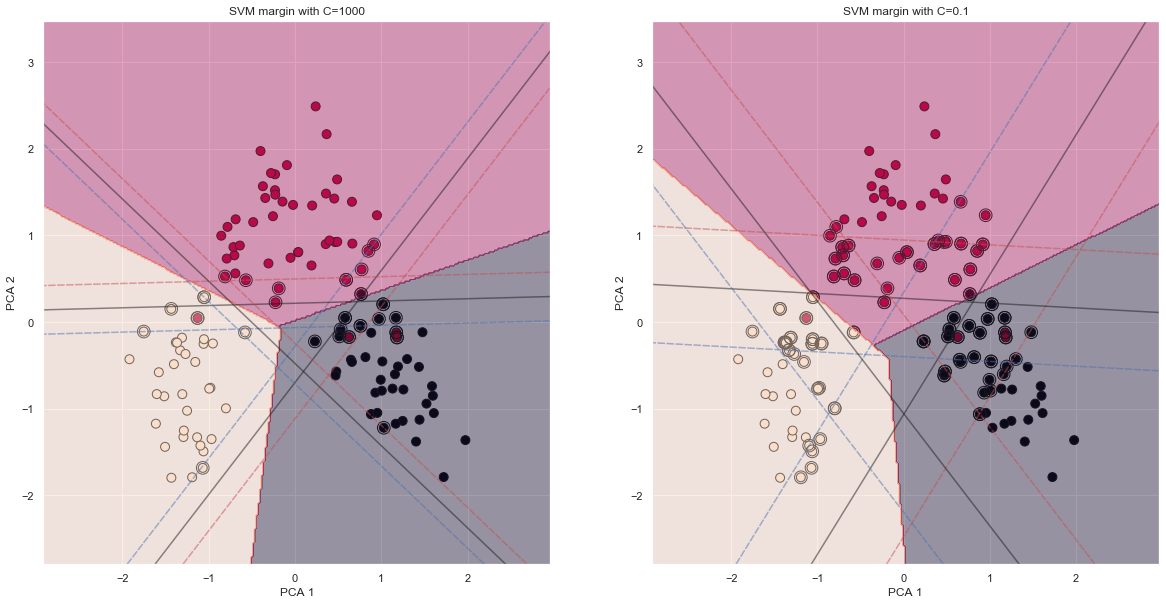

In [35]:
c1 = 1000
c2 = 0.1
fig, ax = plt.subplots(1, 2, figsize=(20,10))
#print(X_train_full_std.shape, y_train_full.shape)
plot_decision_SVM_margins(c1, X_train_full_std, y_train_full, ax[0], 
                          colors, f"SVM margin with C={c1}",data.feature_names[0], data.feature_names[1])
plot_decision_SVM_margins(c2, X_train_full_std, y_train_full, ax[1], 
                          colors, f"SVM margin with C={c2}",data.feature_names[0], data.feature_names[1])

In [36]:
#TODO: move to utils.py
def plot_decision_SVM_boundaries(X, y, clf, ax, x_label=None, y_label=None):	
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    #colors = [plt.cm.Accent(i) for i in [0, 4, 7]]
    xlim = [X[:, 0].min()-1, X[:, 0].max()+1]
    ylim = [X[:, 1].min()-1, X[:, 1].max()+1]

    fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    classes = [(0, 1), (0, 2), (1, 2)]
    i=0
    for coef, intercept, col, ax in zip(clf.coef_, clf.intercept_, classes, axes.flatten()):
        
        z = np.sign(xx.ravel() + (yy.ravel() * coef[1] + intercept) / coef[0]) + 1
        #print(z)
        z = z.reshape(xx.shape)
        ax.contourf(xx, yy, z, alpha=0.4)
        #ax.contourf(xx, yy, Z, alpha=0.4)
        ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k') # TODO: add cmap to modify

        ax.title.set_text(f"class {i} vs. rest")
        i += 1
        if x_label is not None:
            ax.set_xlabel(x_label)
        if y_label is not None:
            ax.set_ylabel(y_label)

        #line2 = -(line * coef[1] + intercept) / coef[0]
        #ax.plot(line2, line, "-")#, c=colors[col[0]])
        #ax.plot(line2, line, "--", c=colors[col[1]])
        
        #ax.scatter(clf.support_vectors_[: , 0], clf.support_vectors_[:, 1], s=100,
        #   linewidth=1, facecolors='none', edgecolors='k')

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

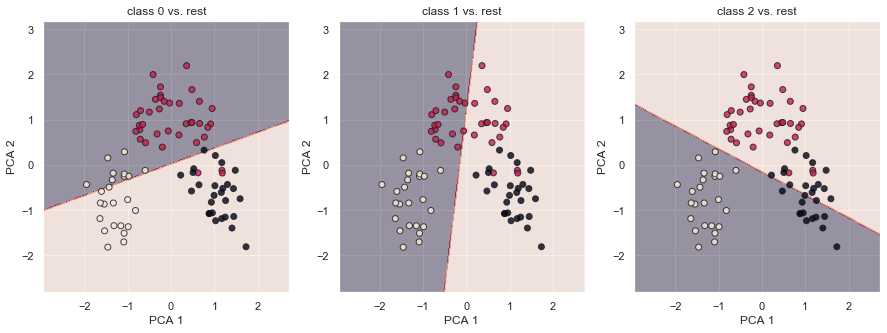

In [37]:
plot_decision_SVM_boundaries(X_train_std, y_train, lsvm_best, ax_, 
                            data.feature_names[0], data.feature_names[1]);

## RBF SVM

In [38]:
# 12-Repeat point 8. (train, plot, etc..), but this time use an RBF kernel
rbf_svc_dict = {c: SVC(C=c, kernel='rbf').fit(X_train_std, y_train) for c in C_values}
#print({c: svc.score(X_val_std, y_val) for c, svc in rbf_svc_dict.items()})

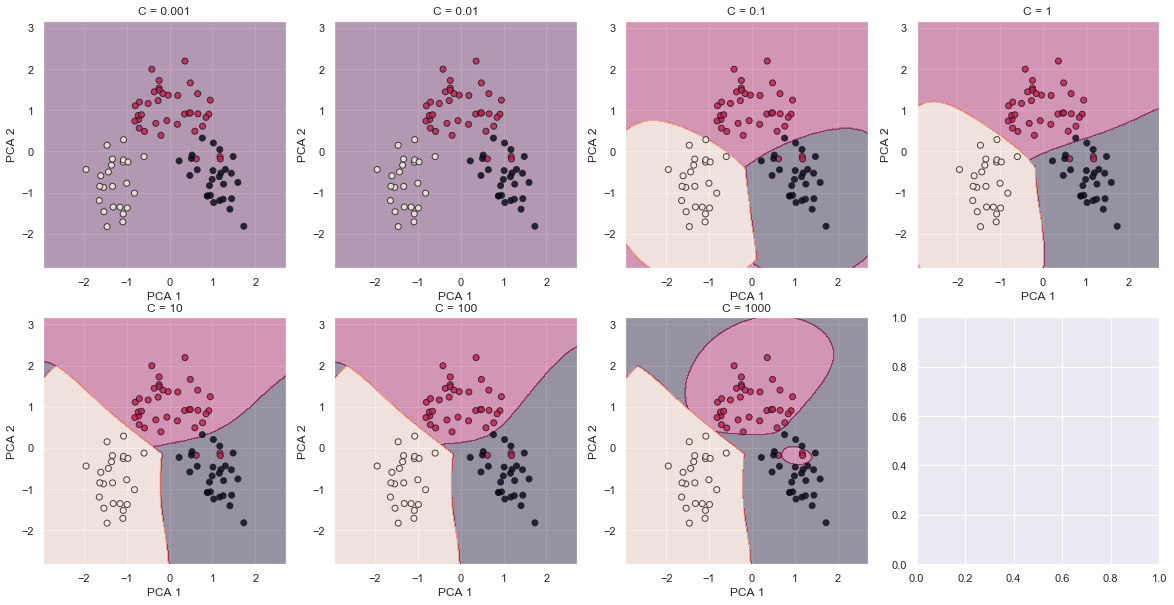

In [39]:
#b. Plot the data and the decision boundaries
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for c, ax_ in zip(C_values, ax.flatten()):
    plot_decision_function(X_train_std, y_train, rbf_svc_dict[c], ax_, 
                           f"C = {c}", data.feature_names[0], data.feature_names[1]);
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/rsvm_1.png')

In [40]:
rbf_svc_scores_val = {c:svc.score(X_val_std, y_val).round(3) for c, svc in rbf_svc_dict.items()}
print(f"Accuracy scores: {rbf_svc_scores_val}")
print()
print("Precision, Recall and F-score:")
pred = {k: v.predict(X_val_std) for k, v in rbf_svc_dict.items()}

prfs = {k: precision_recall_fscore_support(y_val, v, average='weighted', 
                                           warn_for={}) for k, v in pred.items()} 
#warn_for={} because otherwise it gets a waning for C=1e-3 since some classes does not have entries

for k, v in prfs.items():
    print(f"{k}\t:\tprecision: {v[0]:.3f}\trecall: {v[1]:.3f}\tfscore: {v[2]:.3f}")

Accuracy scores: {0.001: 0.361, 0.01: 0.361, 0.1: 0.972, 1: 0.972, 10: 0.972, 100: 0.972, 1000: 0.861}

Precision, Recall and F-score:
0.001	:	precision: 0.130	recall: 0.361	fscore: 0.192
0.01	:	precision: 0.130	recall: 0.361	fscore: 0.192
0.1	:	precision: 0.975	recall: 0.972	fscore: 0.972
1	:	precision: 0.975	recall: 0.972	fscore: 0.972
10	:	precision: 0.975	recall: 0.972	fscore: 0.972
100	:	precision: 0.975	recall: 0.972	fscore: 0.972
1000	:	precision: 0.865	recall: 0.861	fscore: 0.860


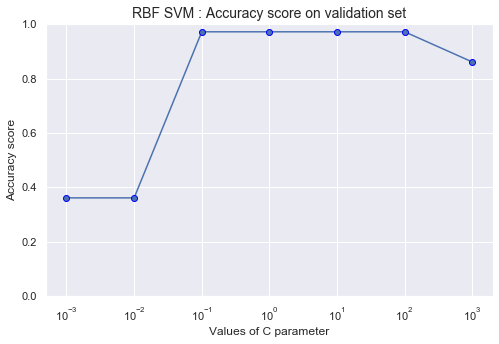

In [41]:
#plot Accuracy vs C value
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel('Values of C parameter')
ax.set_ylabel('Accuracy score')
plt.xticks(C_values)
plt.xscale('log')
ax.set_title("RBF SVM : Accuracy score on validation set", 
             fontdict={'fontsize':14})
ax.set_ylim([0., 1.])
ax.plot(C_values, list(rbf_svc_scores_val.values()), marker = 'o', markeredgecolor= 'blue');
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/rsvm_2.png')

In [42]:
rbf_best = SVC(C=1, kernel='rbf').fit(X_train_full_std, y_train_full)
print("Best RBF SVM model")
print(f"\tAccuracy score on test set: {rbf_best.score(X_test_std, y_test): .3}")
prf = precision_recall_fscore_support(y_test, lsvm_best.predict(X_test_std), average='weighted')
print(f"\tPrecision: {prf[0]:.3}\trecall: {prf[1]:.3}\tfscore: {prf[2]:.3}")

Best RBF SVM model
	Accuracy score on test set:  0.981
	Precision: 0.982	recall: 0.981	fscore: 0.981


## Drawbacks of Validataion Set Approach

In [43]:
def plot_multiple_runs(clf, params, ax, kernel=None, N=50, title=None, xlabel=None, ylabel=None):
    if kernel is not None:
        ax.set_xscale('log')
    
    for n in range(N):
        X_train, X_val, X_test, y_train, y_val, y_test = \
            train_validation_test_split(features, labels, shuffle=True) 
        X_train_std, X_val_std, X_test_std, X_train_full_std, X_test_full_std, y_train_full=\
            standardize(X_train, X_val, X_test, y_train)
        clf_dict = {}
        
        for p in params:
            if kernel is None:
                clf_ = clf(p)
            else:
                clf_ = clf(p, kernel)
            clf_.fit(X_train_std, y_train)
            clf_dict[p] = clf_
        scores = {k: v.score(X_val_std, y_val).round(3) for k, v in clf_dict.items()}
        #print(scores)
        ax.plot(params, list(scores.values()), '-o');
    
    ax.set_xticks(params)
    ax.set_ylim([0., 1.])
    
    if title is not None:
        ax.set_title(title)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if xlabel is not None:
        ax.set_xlabel(xlabel)


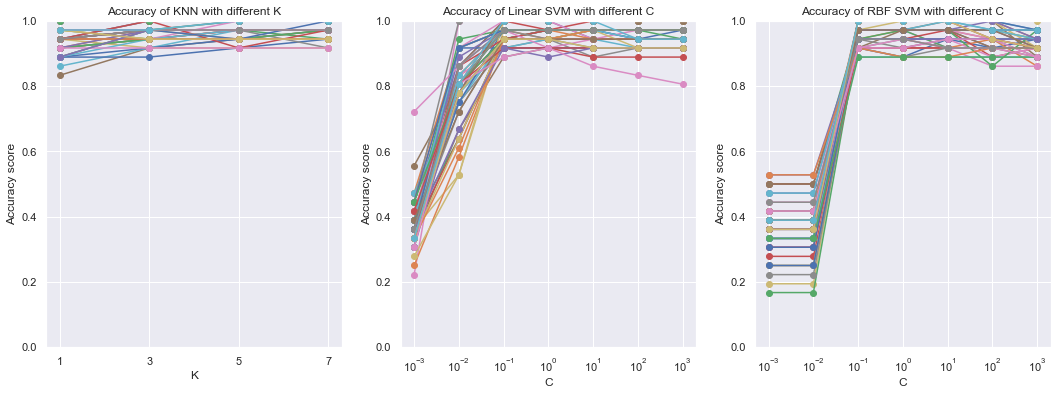

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

plot_multiple_runs(KNeighborsClassifier, k_values, ax[0],
                   title="Accuracy of KNN with different K", ylabel="Accuracy score", xlabel="K")

plot_multiple_runs(SVC, C_values, ax[1], kernel='linear',
                   title="Accuracy of Linear SVM with different C", ylabel="Accuracy score", xlabel="C")

plot_multiple_runs(SVC, C_values, ax[2], kernel='rbf',
                   title="Accuracy of RBF SVM with different C", ylabel="Accuracy score", xlabel="C")

# Grid Search Model Tuning

In [45]:
from GridSearch import GridSearch #TODO: move at the beginning

In [46]:
#param_grid = {'C': list(np.arange(0.1, 10.5, 0.5)) + C_values,
#              'gamma': np.arange(0.01, 10, 0.01)}
gamma_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]#np.logspace(-5, 5, num=10)

param_grid = {'C': C_values,
              'gamma': gamma_values}

gridsearch = GridSearch(SVC(), param_grid, scoring='accuracy', n_jobs=-1, verbose=True)

res = gridsearch.fit(X_train_std, y_train, X_val_std, y_val)

Fitting 70


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.7s finished


In [47]:
print(res.best_estimator_)
print()
print(f"Best hyperparameters: {res.best_params_}")
print(f"Accuracy on the validation set: {res.best_score_}")

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Best hyperparameters: {'C': 0.1, 'gamma': 1}
Accuracy on the validation set: 0.9722222222222222


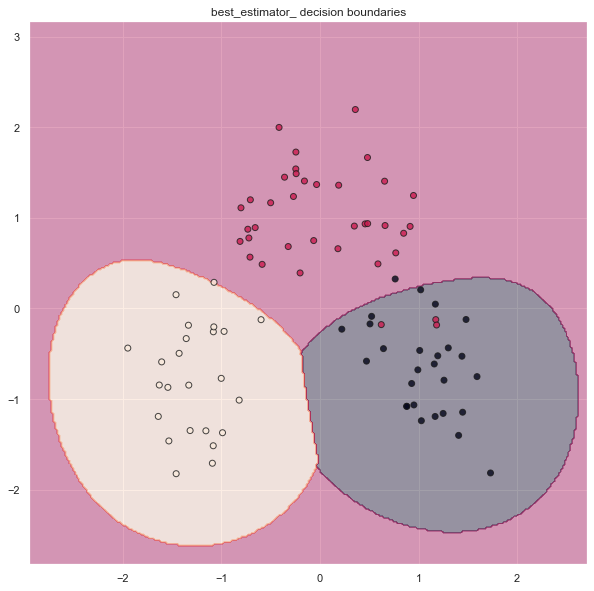

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_train_std, y_train, res.best_estimator_, ax, title="best_estimator_ decision boundaries")
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/grid_1.png')

In [49]:
rbf_best_grid = res.best_estimator_
rbf_best_grid.fit(X_train_full_std, y_train_full)
print("Best RBF SVM model obtained with Grid Search")
print(f"\tAccuracy score on test set: {rbf_best_grid.score(X_test_std, y_test): .3}")
prf = precision_recall_fscore_support(y_test, rbf_best_grid.predict(X_test_std), average='weighted')
print(f"\tPrecision: {prf[0]:.3}\trecall: {prf[1]:.3}\tfscore: {prf[2]:.3}")

Best RBF SVM model obtained with Grid Search
	Accuracy score on test set:  0.981
	Precision: 0.982	recall: 0.981	fscore: 0.981


In [50]:
#res.results_

In [51]:
scores = res.results_['mean_test_score'].reshape(len(C_values),
                                                 len(gamma_values))
#scores

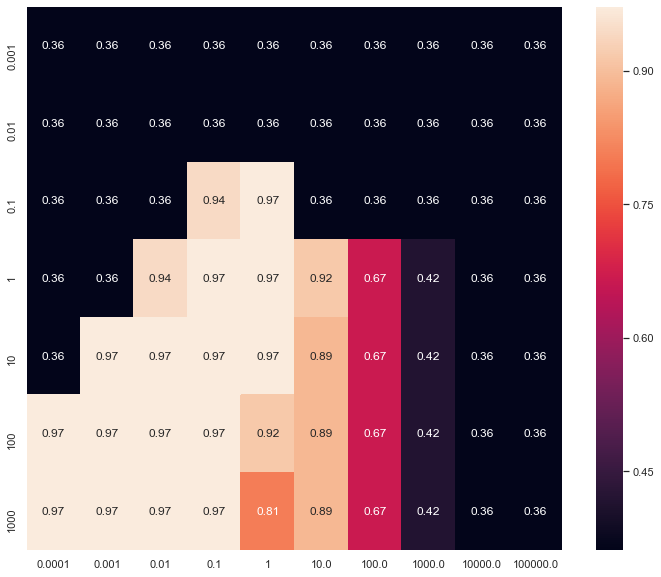

In [52]:
fig, ax = plt.subplots(figsize=(12,10))
htmp = sns.heatmap(scores, annot=True, yticklabels=C_values, xticklabels=gamma_values);

# k-Fold Cross Validation

In [53]:
from sklearn.model_selection import KFold, GridSearchCV
kfold = KFold(5)
gridsearchCV = GridSearchCV(SVC(kernel='rbf'), param_grid, scoring='accuracy', cv=kfold, n_jobs=-1, verbose=True)
resCV = gridsearchCV.fit(X_train_full_std, y_train_full)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    2.4s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
print(resCV.best_estimator_)
print()
print(f"Best hyperparameters: {resCV.best_params_}")
print(f"Accuracy on the validation set: {resCV.best_score_}")

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Best hyperparameters: {'C': 10, 'gamma': 0.1}
Accuracy on the validation set: 0.967741935483871


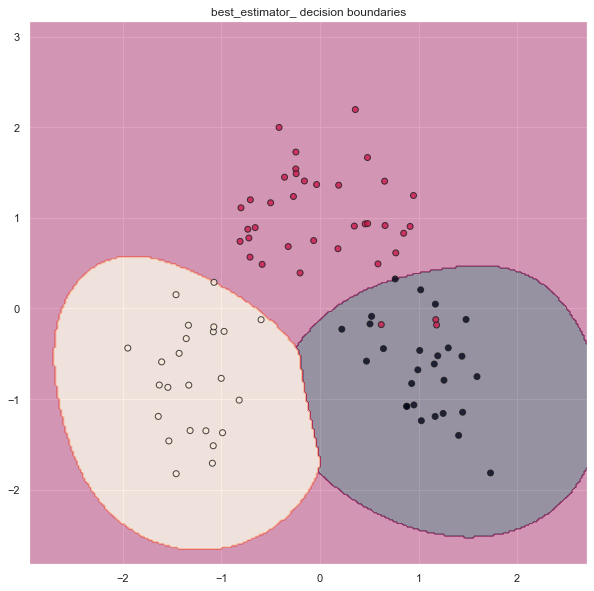

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_decision_function(X_train_std, y_train, res.best_estimator_, ax, title="best_estimator_ decision boundaries")
plt.savefig('/Users/riccardomereu/Desktop/Report Template/figures/CV_1.png')

In [56]:
scoresCV = resCV.cv_results_['mean_test_score'].reshape(len(C_values),
                                                 len(gamma_values))

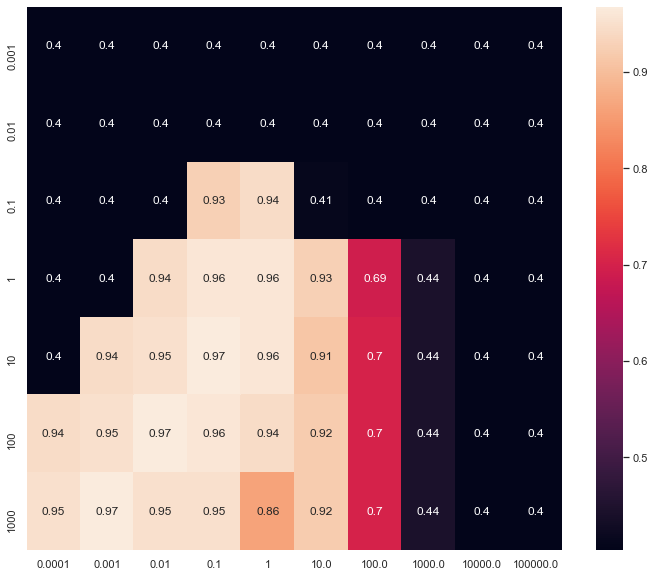

In [57]:
fig, ax = plt.subplots(figsize=(12,10))
htmp = sns.heatmap(scoresCV, annot=True, yticklabels=C_values, xticklabels=gamma_values);

# POINT 20 : Other features

In [58]:
# k-NeaN